In [1]:
# Load all the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

## Task 1

#### Task 1.1 and 1.2

In [4]:
# Load the dataset into the Jupyter Notebook.
data_csv = pd.read_csv('data/CC_Default.csv')

In [5]:
# Show preview of the data by showing first 5 rows.
data_csv.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# Show the number of rows and columns on the dataset.
data_csv.shape

(30000, 25)

In [7]:
# Show statistical information of the dataset.
data_csv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
# Show the data-type of each variables from the dataset.
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
# Even though it's already shown on above cell, this way also tells whether there's null data or not.
data_is_null = data_csv.isnull().sum()
print (data_is_null)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [10]:
# Convert data-type of that consider as categorical, into "category".
cat_columns = ['SEX','EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
data_csv[cat_columns] = data_csv[cat_columns].astype('category')

data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  float64 
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  category
 7   PAY_2                       30000 non-null  category
 8   PAY_3                       30000 non-null  category
 9   PAY_4                       30000 non-null  category
 10  PAY_5                       30000 non-null  category
 11  PAY_6                       30000 non-null  category
 12  BILL_AMT1                   30000 non-null  float64 
 13  BILL_AMT2       

In [11]:
# Show statistical information of the dataset, post data-type conversion.
data_csv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0


In [12]:
# Check for null data in the dataset, post data-type conversion.
data_is_null = data_csv.isnull().sum()
print (data_is_null)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


#### Task 1.3

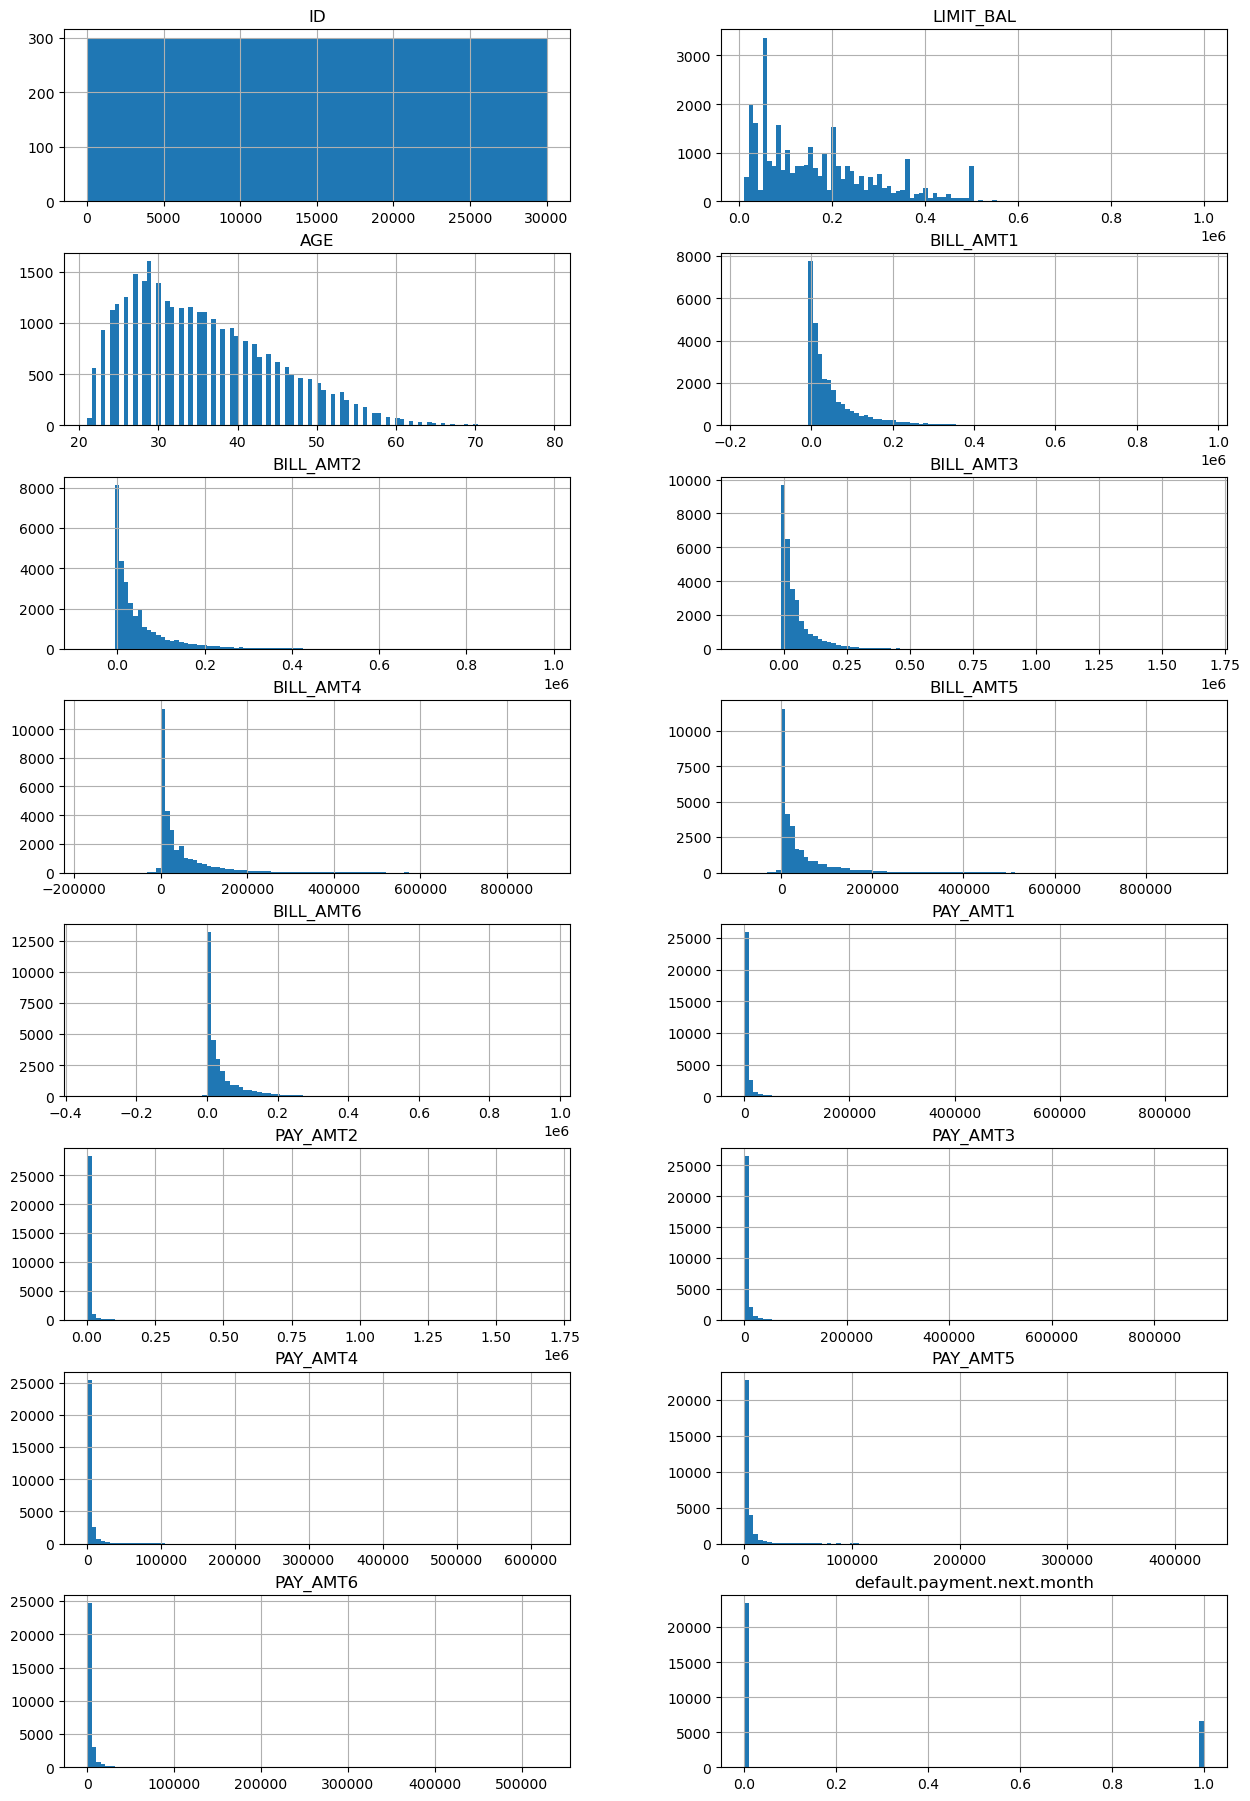

In [14]:
# Shows some histogram to see how each data were distribute statistically.
df = data_csv
df.hist(stacked=False, bins=100, figsize=(15,40), layout=(14,2));

In [15]:
# Setting up Correlation Matrix for the dataset.
data_corr = data_csv.drop(columns=['ID'])
corr_matrix = data_corr.corr()

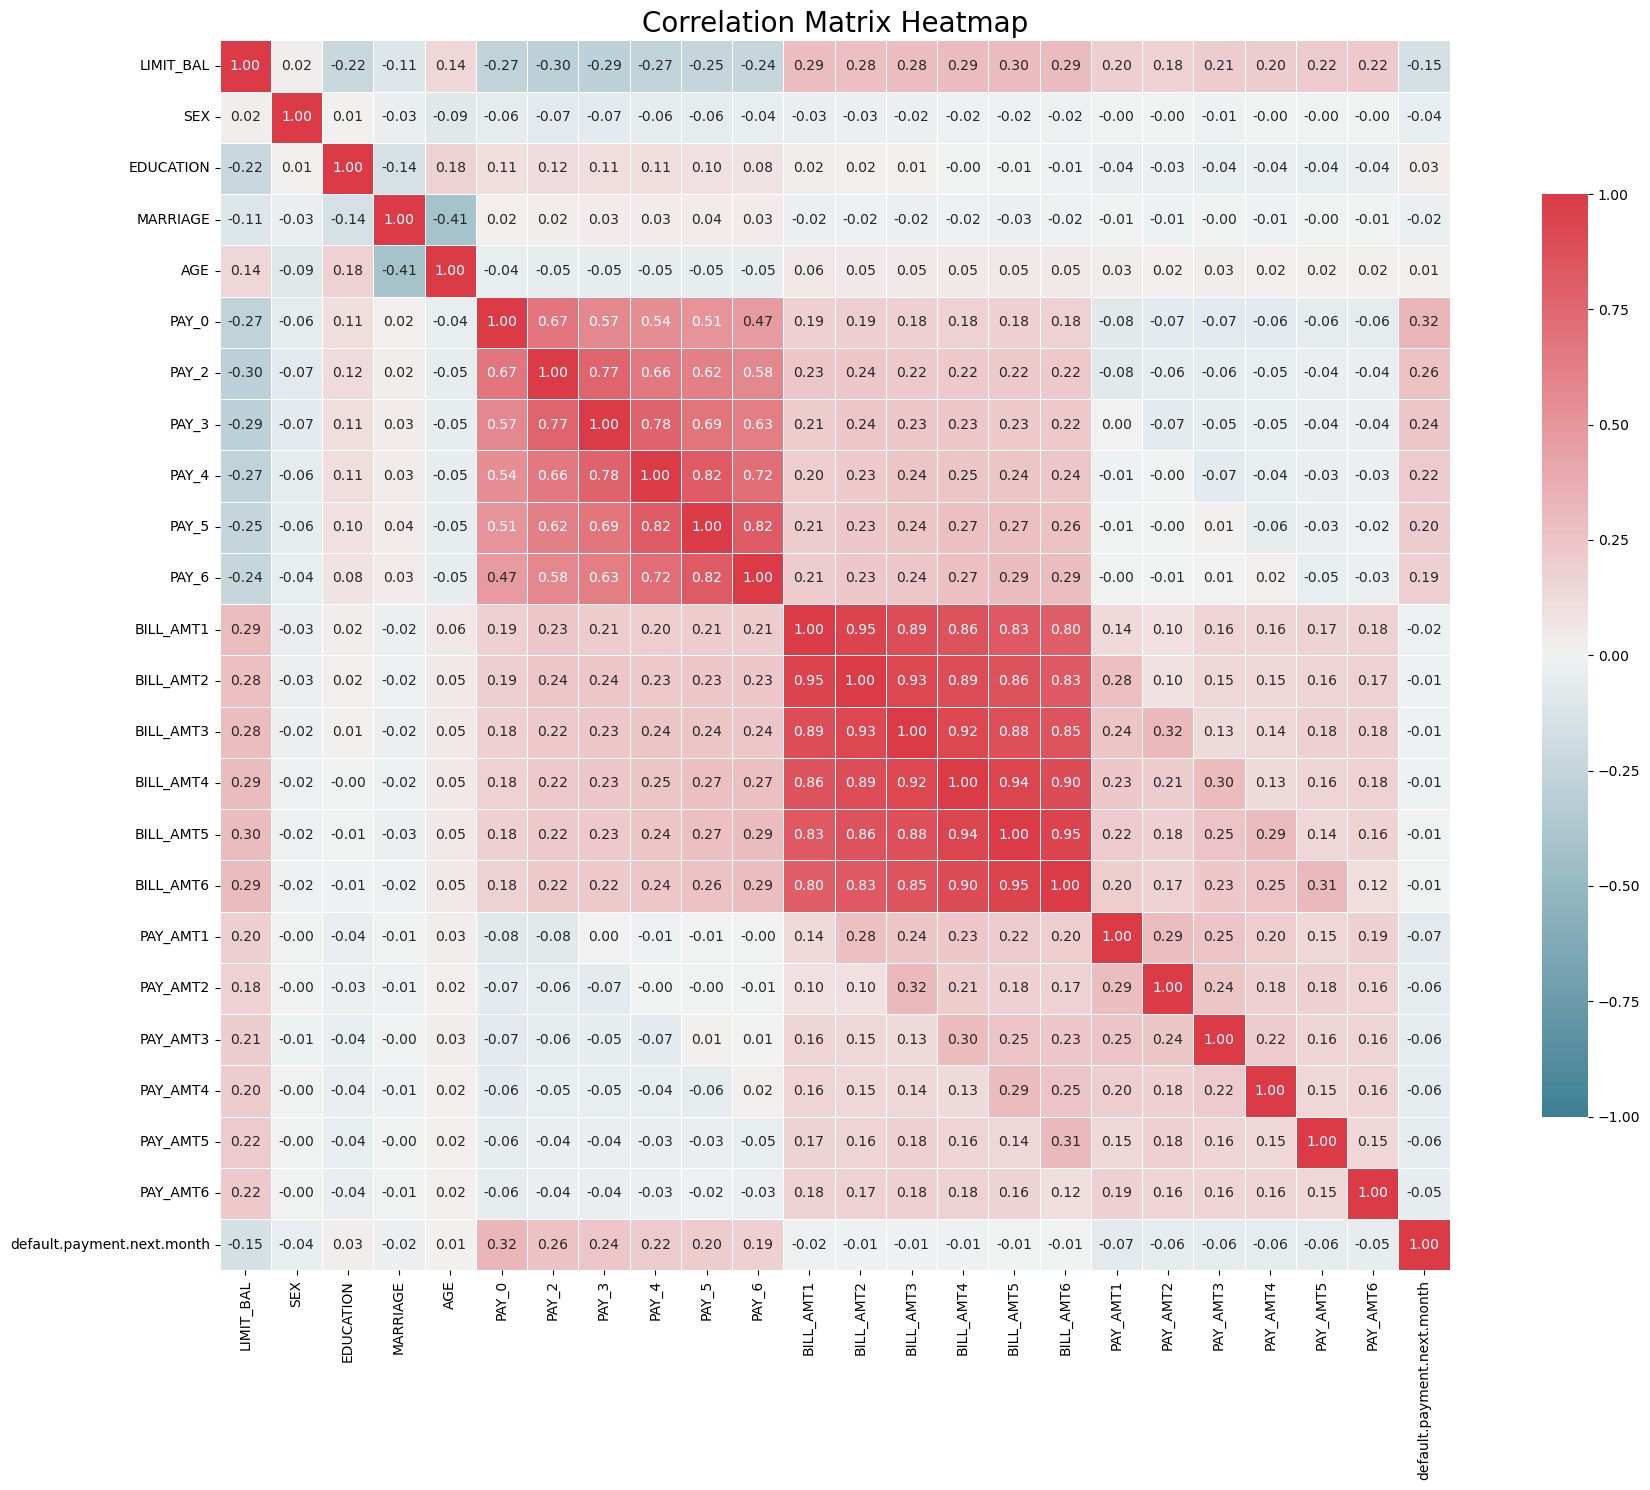

In [16]:
# Set the size of the matplotlib figure
plt.figure(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap=cmap,
            linewidths=.5,
            vmax=1, vmin=-1,
            square=True,
            cbar_kws={"shrink": .75})

# Add a title
plt.title('Correlation Matrix Heatmap', fontsize=20)

# Adjust layout to make room for the title
plt.tight_layout()

# Show the plot
plt.show()


#### Task 1.4

The dependant variables is: ***default.payment.next.month*** , as it shows weaker correlation compare to most variables.

The independant variables with strong positive correlation are:
* between ***PAY_(x)*** and ***PAY(x)***
* between ***BILL_AMT(x)*** and ***BILL_AMT(x)***

And the weak positive correlation are:
* between ***PAY_(x)*** and ***BILL_AMT(x)***
* between ***PAY_AMT(x)*** and ***BILL_AMT(x)***

The variables that could detect defaulters is: ***PAY_(x)*** with ***default.payment.next.month***, even though it shows weak correlation.



From the correlation Matrix, we can imply as follows:

Between ***BILL_AMT(x)*** and ***BILL_AMT(x+1)***, ie: ***BILL_AMT1*** and ***BILL_AMT2***, there's strong positive correlation. \
Suggested that if customer has more bill in one month, they likely to have more bill in the previous month.

Between ***PAY_(x)*** and ***PAY_(x+1)***, ie: ***PAY_2*** and ***PAY3***, there's strong positive correlation. \
Suggested that if customer has delay payment on one month, they likely will have more delay payment on previous month.

Between ***PAY_(x)*** and ***BILL_AMT(x-1)***, ie: ***PAY_5*** and ***BILL_AMT4***, there's weak positive correlation. \
Suggested that if customer has delay payment on one month, they likely will have more bill on next month.

Between ***PAY_AMT(x)*** and ***BILL_AMT(x+1)***, ie: ***PAY_AMT4*** and ***BILL_AMT5***, there's weak positive correlation. \
Suggested that if customer has make more payment on one month, they likely have more bill on previous month

Between ***default.payment.next.month*** and ***PAY_(x)***, there's weak positive correlation. \
Suggested that whoever has delay the bill, will have some chance the payment will be default.


## Task 2

#### Task 2.1

In [22]:
#Load the train dataset.
data_train_csv = pd.read_csv('data/Train.csv')

In [23]:
# Preview first 5 rows from the train dataset.
data_train_csv.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,2,120000,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,4,50000,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,5,50000,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,6,50000,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
4,7,500000,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [24]:
# Show the number of rows and columns on the train dataset.
data_train_csv.shape

(26000, 25)

In [25]:
# Convert data-type of that consider as categorical, into "category", on train dataset.
cat_train_columns = ['SEX','EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
data_train_csv[cat_train_columns] = data_train_csv[cat_train_columns].astype('category')

data_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         26000 non-null  int64   
 1   LIMIT_BAL  26000 non-null  int64   
 2   SEX        26000 non-null  category
 3   EDUCATION  26000 non-null  category
 4   MARRIAGE   26000 non-null  category
 5   AGE        26000 non-null  int64   
 6   PAY_0      26000 non-null  category
 7   PAY_2      26000 non-null  category
 8   PAY_3      26000 non-null  category
 9   PAY_4      26000 non-null  category
 10  PAY_5      26000 non-null  category
 11  PAY_6      26000 non-null  category
 12  BILL_AMT1  26000 non-null  int64   
 13  BILL_AMT2  26000 non-null  float64 
 14  BILL_AMT3  26000 non-null  float64 
 15  BILL_AMT4  26000 non-null  float64 
 16  BILL_AMT5  26000 non-null  float64 
 17  BILL_AMT6  26000 non-null  float64 
 18  PAY_AMT1   26000 non-null  float64 
 19  PAY_AMT2   26000 non-null

In [26]:
# Show statistical information of the train dataset, post data-type conversion.
data_train_csv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,26000.0,14996.430462,8663.219017,2.0,7479.75,14969.5,22500.25,30000.0
LIMIT_BAL,26000.0,167440.846154,129672.200019,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,26000.0,35.492115,9.208619,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,26000.0,51285.487154,73508.698857,-165580.0,3585.50,22586.5,67508.50,964511.0
BILL_AMT2,26000.0,49205.394962,71001.158942,-69777.0,3003.00,21417.0,64334.75,983931.0
BILL_AMT3,26000.0,46995.264231,69232.190855,-61506.0,2698.00,20199.0,60401.50,1664089.0
BILL_AMT4,26000.0,43257.653308,64212.237894,-170000.0,2400.00,19117.5,54833.25,891586.0
BILL_AMT5,26000.0,40279.748731,60593.196802,-81334.0,1813.00,18167.5,50289.00,927171.0
BILL_AMT6,26000.0,38857.180192,59331.740317,-339603.0,1261.00,17203.5,49350.25,961664.0
PAY_AMT1,26000.0,5659.285346,15957.380183,0.0,1000.00,2106.0,5009.00,505000.0


In [27]:
# Check for null value in the train dataset.
data_train_is_null = data_train_csv.isnull().sum()
print (data_train_is_null)

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64


#### Task 2.2

In [29]:
# Train the train dataset using LR (Logistic Regression) model, pre-variables dropped.
X_train = data_train_csv.drop('Default', axis=1)
y_train = data_train_csv['Default']

model_LR = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model_LR.fit(X_train, y_train)

C:\Users\ardne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

#### Task 2.3

In [31]:
# Setting up Correlation Matrix on the train dataset, pre-variables dropped.
data_train_corr = data_train_csv.drop(columns=['ID'])
corr_train_matrix = data_train_corr.corr()

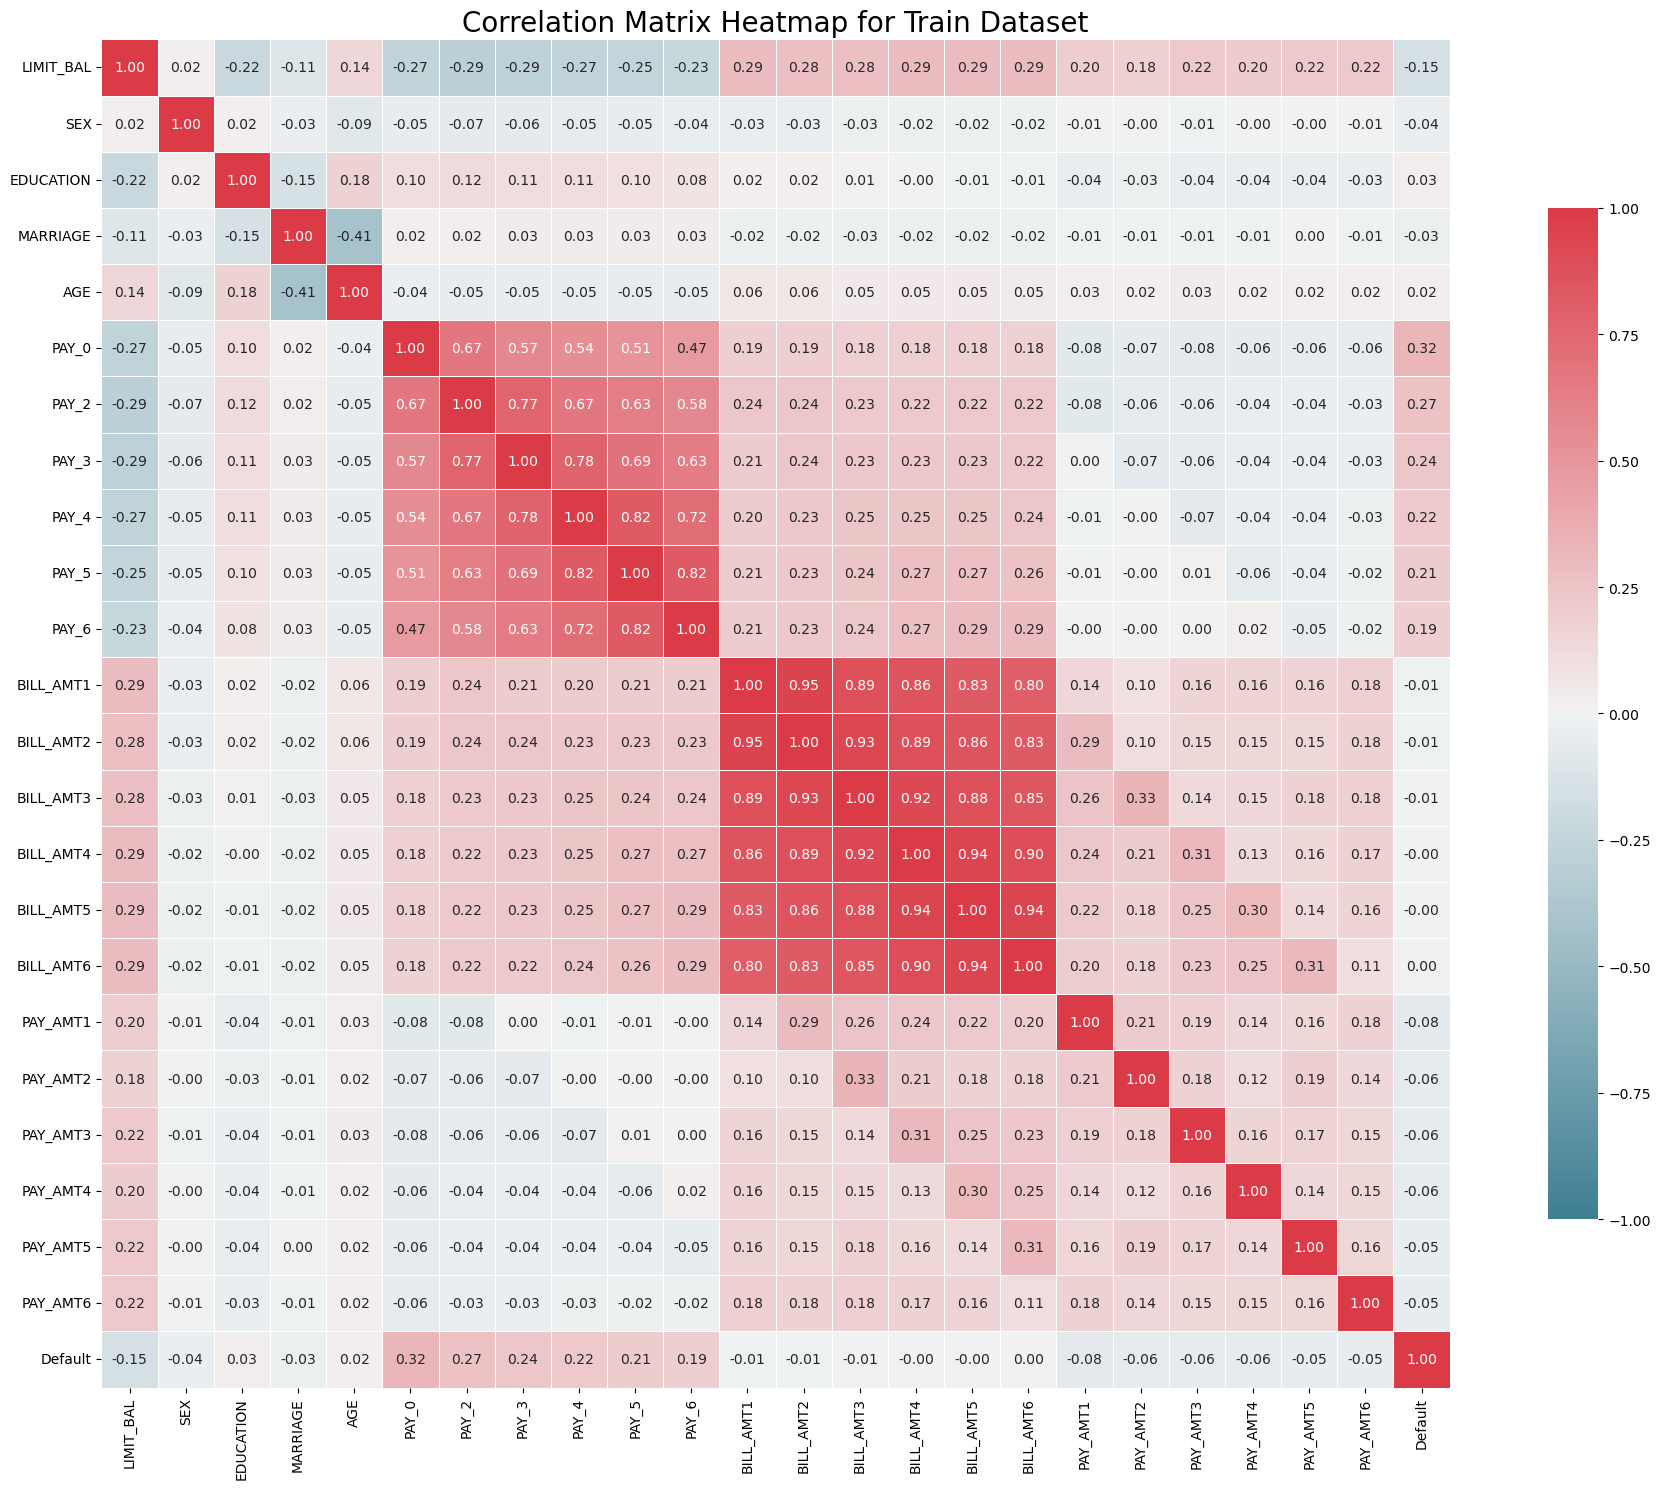

In [32]:
# Set the size of the matplotlib figure for train dataset, pre-variables dropped.
plt.figure(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_train_matrix,
            annot=True,
            fmt=".2f",
            cmap=cmap,
            linewidths=.5,
            vmax=1, vmin=-1,
            square=True,
            cbar_kws={"shrink": .75})

# Add a title
plt.title('Correlation Matrix Heatmap for Train Dataset', fontsize=20)

# Adjust layout to make room for the title
plt.tight_layout()

# Show the plot
plt.show()


In [33]:
# Identify pairs of variables with high correlation (e.g., above 0.6) to be remove, for train dataset.
high_correlation_pairs = np.where(np.abs(corr_train_matrix) > 0.6)
high_correlation_pairs = [(corr_train_matrix.index[x], corr_train_matrix.columns[y])
                          for x, y in zip(*high_correlation_pairs) if x != y and x < y]

print("High correlation pairs:", high_correlation_pairs)

High correlation pairs: [('PAY_0', 'PAY_2'), ('PAY_2', 'PAY_3'), ('PAY_2', 'PAY_4'), ('PAY_2', 'PAY_5'), ('PAY_3', 'PAY_4'), ('PAY_3', 'PAY_5'), ('PAY_3', 'PAY_6'), ('PAY_4', 'PAY_5'), ('PAY_4', 'PAY_6'), ('PAY_5', 'PAY_6'), ('BILL_AMT1', 'BILL_AMT2'), ('BILL_AMT1', 'BILL_AMT3'), ('BILL_AMT1', 'BILL_AMT4'), ('BILL_AMT1', 'BILL_AMT5'), ('BILL_AMT1', 'BILL_AMT6'), ('BILL_AMT2', 'BILL_AMT3'), ('BILL_AMT2', 'BILL_AMT4'), ('BILL_AMT2', 'BILL_AMT5'), ('BILL_AMT2', 'BILL_AMT6'), ('BILL_AMT3', 'BILL_AMT4'), ('BILL_AMT3', 'BILL_AMT5'), ('BILL_AMT3', 'BILL_AMT6'), ('BILL_AMT4', 'BILL_AMT5'), ('BILL_AMT4', 'BILL_AMT6'), ('BILL_AMT5', 'BILL_AMT6')]


In [34]:
# Train the train data with LR, with dropped variables as per suggested by Correlation Matrix.
X_corr_drop = data_train_csv.drop(['Default', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1)

model_LR_corr_drop = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model_LR_corr_drop.fit(X_corr_drop, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

**Explanation on Variables Removal (Dropped):**

Based from the Correlation Matrix, I've removed the variables which the one that has score more than 0.6. \
Those variables that being removed are:
* **PAY_2, PAY_3, PAY_4, PAY_5, PAY_6**
* **BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6**


#### Task 2.4

In [37]:
#Load the test dataset.
data_test_csv = pd.read_csv('data/Test.csv')

In [38]:
# Check the number of columns and rows from the test dataset.
data_test_csv.shape

(4000, 25)

In [39]:
# Preview first 5 rows from the test dataset.
data_test_csv.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,5170,140000,2,2,2,26,0,0,2,0,...,125046,46364.0,83460,125000,6.0,4578.0,1427.0,87179.0,26291.0,1
1,22727,90000,2,1,2,31,1,-2,-2,-2,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
2,4884,150000,2,1,2,32,2,2,2,0,...,123954,131543.0,134319,6000,3000.0,4600.0,9800.0,5100.0,5000.0,1
3,7142,30000,2,2,2,21,-2,-2,-2,-2,...,4311,1551.0,0,780,3260.0,4311.0,1551.0,0.0,0.0,0
4,19043,70000,2,2,2,23,2,2,2,0,...,18013,19315.0,19859,2850,0.0,1400.0,1600.0,1000.0,0.0,1


In [40]:
# Convert data-type of that consider as categorical, into "category", on test dataset.
cat_test_columns = ['SEX','EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
data_test_csv[cat_test_columns] = data_test_csv[cat_test_columns].astype('category')

data_test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         4000 non-null   int64   
 1   LIMIT_BAL  4000 non-null   int64   
 2   SEX        4000 non-null   category
 3   EDUCATION  4000 non-null   category
 4   MARRIAGE   4000 non-null   category
 5   AGE        4000 non-null   int64   
 6   PAY_0      4000 non-null   category
 7   PAY_2      4000 non-null   category
 8   PAY_3      4000 non-null   category
 9   PAY_4      4000 non-null   category
 10  PAY_5      4000 non-null   category
 11  PAY_6      4000 non-null   category
 12  BILL_AMT1  4000 non-null   float64 
 13  BILL_AMT2  4000 non-null   int64   
 14  BILL_AMT3  4000 non-null   int64   
 15  BILL_AMT4  4000 non-null   int64   
 16  BILL_AMT5  4000 non-null   float64 
 17  BILL_AMT6  4000 non-null   int64   
 18  PAY_AMT1   4000 non-null   int64   
 19  PAY_AMT2   4000 non-null   

In [41]:
# Test the test data using LR model, pre-variables dropped.
X_test = data_test_csv.drop('Default', axis=1)
y_test = data_test_csv['Default']

X_test_pred = model_LR.predict(X_test)

In [42]:
# Test the test data using LR model, post-variable dropped, based on sugestion from Correlation matrix.
X_test_corr_drop = data_test_csv.drop(['Default', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis=1)
X_test_pred_corr = model_LR_corr_drop.predict(X_test_corr_drop)

#### Task 2.5 and 2.6

In [44]:
# Confusion Matrix and Clasiffication Report, pre-variables dropped.
print(confusion_matrix(y_test, X_test_pred))
print(classification_report(y_test, X_test_pred))

[[2026 1092]
 [ 297  585]]
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      3118
           1       0.35      0.66      0.46       882

    accuracy                           0.65      4000
   macro avg       0.61      0.66      0.60      4000
weighted avg       0.76      0.65      0.68      4000



In [45]:
# Confusion Matrix and Clasiffication Report, post-variables dropped, using Correlation matrix.
print(confusion_matrix(y_test, X_test_pred_corr))
print(classification_report(y_test, X_test_pred_corr))

[[2258  860]
 [ 316  566]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      3118
           1       0.40      0.64      0.49       882

    accuracy                           0.71      4000
   macro avg       0.64      0.68      0.64      4000
weighted avg       0.77      0.71      0.73      4000



**Insights:**

Using **Logistic Regression (LR)** model, as compare between pre-variables dropped, and post-variables dropped (using Correlation Matrix), based from Confusion matrix and Accuracy score: \
The accuracy increasing, from **0.56** to **0.59**, post-variables dropped.

However, based from **Class 1** on **Precision (0.29)**, **Recall (0.60)**, and **F1-score (0.39)**, it's indicating low. \
Thus, the LR model is consider quite OK to detect default payment accurately, but not accurate enough.


## Task 3

#### Task 3.1

In [49]:
# Train and test the dataset using RF (Random Forest), with using dropped variables as per suggested from Correlation Matrix.
rfcl = RandomForestClassifier(n_estimators = 500, max_depth=3, random_state=1,max_features=3)
rfcl = rfcl.fit(X_corr_drop, y_train)
X_RF_test_pred_corr = rfcl.predict(X_test_corr_drop)

#### Task 3.2

In [51]:
# Confusion Matrix and Clasiffication Report from RF model, post-variables dropped using Correlation matrix.
print(confusion_matrix(y_test, X_RF_test_pred_corr))
print(classification_report(y_test, X_RF_test_pred_corr))

[[3066   52]
 [ 756  126]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3118
           1       0.71      0.14      0.24       882

    accuracy                           0.80      4000
   macro avg       0.76      0.56      0.56      4000
weighted avg       0.78      0.80      0.74      4000



**Observation:**

When using **Random Forest (RF)** model, compare to **Logistic Regression (LR)** model (with both variables dropped based on Correlation Matrix), Accuracy score is improving much, from **0.59** to **0.80**.

However, from the Confusion Matrix, and as per shown **from Class 1** on **Precision (0.71)**, **Recall (0.14)** and **F1-score (0.24)**, the model is still giving **low** score of True Positive.

This means the model not able to detect much customer that is going to be default on the payment. \
The model only able to detect customer that is **NOT** going to be default on the payment.

## Task 4

#### Task 4.1

In [55]:
# Use scaler on the dataset before using SVM model, for post-variables dropped using Correlation Matrix.
scaler = StandardScaler()
X_corr_drop = scaler.fit_transform(X_corr_drop)
X_test_corr_drop = scaler.transform(X_test_corr_drop)

In [56]:
# Train and test dataset using SVM model, post-variables dropped using Correlation Matrix.
svm_classifier_corr = SVC(gamma=0.025, C=3)
svm_classifier_corr.fit(X_corr_drop, y_train)
X_SVM_test_pred_corr = svm_classifier_corr.predict(X_test_corr_drop)

#### Task 4.2

In [58]:
# Check the Confusion Matrix and Accuracy, from dataset post-variables dropped using Correlation Matrix.
print(confusion_matrix(y_test, X_SVM_test_pred_corr))
print(classification_report(y_test, X_SVM_test_pred_corr, zero_division=1))

[[2993  125]
 [ 608  274]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3118
           1       0.69      0.31      0.43       882

    accuracy                           0.82      4000
   macro avg       0.76      0.64      0.66      4000
weighted avg       0.80      0.82      0.79      4000



**Observation:**

As for using **Support Vector Machine (SVM)** model, compare to **RF**, Accuracy score are slightly increasing, from **0.80** to **0.82**.

And as from Confusion Matrix, and as per shown from **Class 1** for **Precision (0.69)**, **Recall (0.31)** and **F1-score (0.43)**, all score are also slightly increasing. \
This indicates that the SVM model are slightly improved on detecting customer that is going to be default.


## Task 5

#### Task 5.1 and 5.2

In [62]:
# Train and test the test dataset using ANN model, post-variables dropped based on Correlation Matrix.
ann_model = Sequential()
ann_model.add(Input(shape=(X_corr_drop.shape[1],)))
ann_model.add(Dense(16, activation='relu', kernel_initializer='normal'))
ann_model.add(Dense(8, activation='relu', kernel_initializer='normal'))
ann_model.add(Dense(8, activation='relu', kernel_initializer='normal'))
ann_model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann_train = ann_model.fit(X_corr_drop, y_train, epochs=100, batch_size=15, verbose=1)
ann_pred = ann_model.predict(X_test_corr_drop)

Epoch 1/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.7753 - loss: 0.5287
Epoch 2/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.8134 - loss: 0.4626
Epoch 3/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.8179 - loss: 0.4509
Epoch 4/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8179 - loss: 0.4471
Epoch 5/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8159 - loss: 0.4427
Epoch 6/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8234 - loss: 0.4366
Epoch 7/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8237 - loss: 0.4356
Epoch 8/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.8155 - loss: 0.4452
Epoch 9/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.8196 - loss: 0.4400
Epoch 10/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.8185 - loss: 0.4451
Epoch 11/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8230 - loss: 0.4368
Epoch 1

#### Task 5.3

In [64]:
# Convert predicted probabilities into Class labels (0 or 1) by setting up threshold to 0.5
ann_pred = (ann_pred > 0.5).astype("int32")

# Check the Confusion Matrix and Accuracy, from dataset post-variables dropped using Correlation Matrix.
print(confusion_matrix(y_test, ann_pred))
print(classification_report(y_test, ann_pred))

[[2956  162]
 [ 575  307]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3118
           1       0.65      0.35      0.45       882

    accuracy                           0.82      4000
   macro avg       0.75      0.65      0.67      4000
weighted avg       0.80      0.82      0.79      4000



**Observation:**

Finally, as for using **ANN** model, compare to **SVM**, looking at Accuracy score which is still the same, as well as from Confusion Matrix, and from **Class 1** on **Precision (0.68)**, **Recall (0.31)** and **F1-score (0.43)**, we can consider that there's NOT MUCH improvement happening.

Therefore, the ANN model did not perform much, it is still quite the same thing as what SVM provided.


#### Task 6

Based on the evaluation metrics (Confusion Matrix, Accuracy Score) from LR, RF, SVM and ANN, I think it would be **SVM** model were better to test the dataset.

The reason it's because, it gives significant increase on the accuracy score as compare to RF and LR. \
The other reason as compare to ANN model is, SVM are perform and process much faster in the CPU.

However, the SVM model only perform better on Class 0 than Class 1.